# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan = pd.read_csv('loan_application.csv')

In [3]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001091,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# obsv and treatment-:

   * there are null values present in the dataset, we need to treat those.
   * there are outliers are also present in the dataset to be treated.
   * the standard deviation is high we need to scale the data.
   * there is no need of LOAN ID column, so we need to drop that.
    
    
   * this is the logostic regression problem, hence can be treated as classification problem also.

# EDA
## Univariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

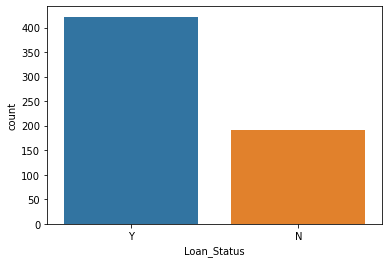

In [8]:
sns.countplot(loan['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

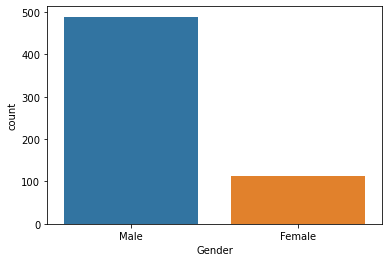

In [9]:
sns.countplot(loan['Gender'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

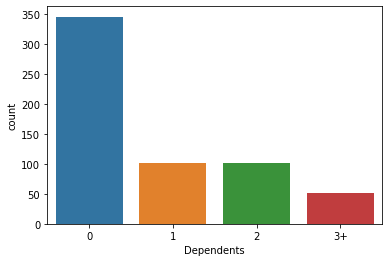

In [10]:
sns.countplot(loan['Dependents'])

<AxesSubplot:xlabel='Married', ylabel='count'>

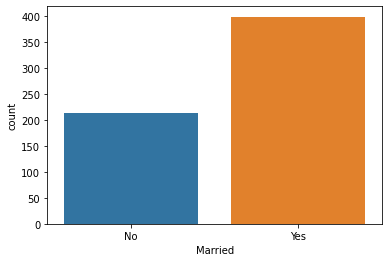

In [11]:
sns.countplot(loan['Married'])

<AxesSubplot:xlabel='Education', ylabel='count'>

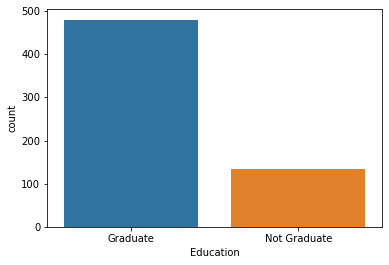

In [12]:
sns.countplot(loan['Education'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

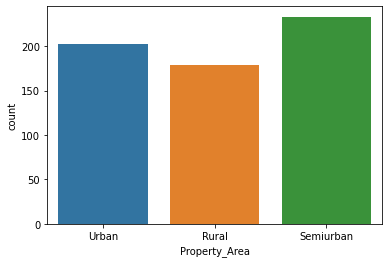

In [13]:
sns.countplot(loan['Property_Area'])

## bivariate analysis

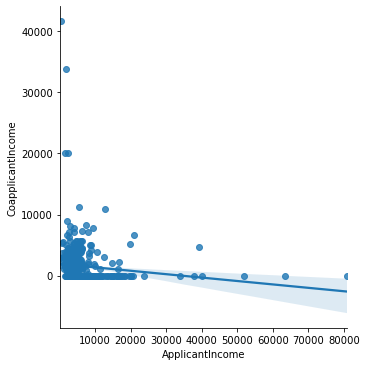

In [16]:
sns.lmplot(x='ApplicantIncome', y = 'CoapplicantIncome', data = loan)

* there are some outliers present in the applicant coapplicant income.

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

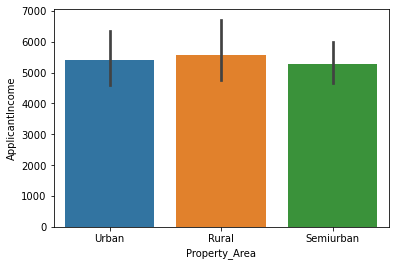

In [22]:
sns.barplot(y = 'ApplicantIncome', x = 'Property_Area', data = loan)

<AxesSubplot:xlabel='Property_Area', ylabel='CoapplicantIncome'>

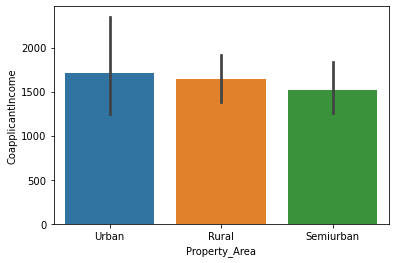

In [23]:
sns.barplot(y = 'CoapplicantIncome', x = 'Property_Area', data = loan)

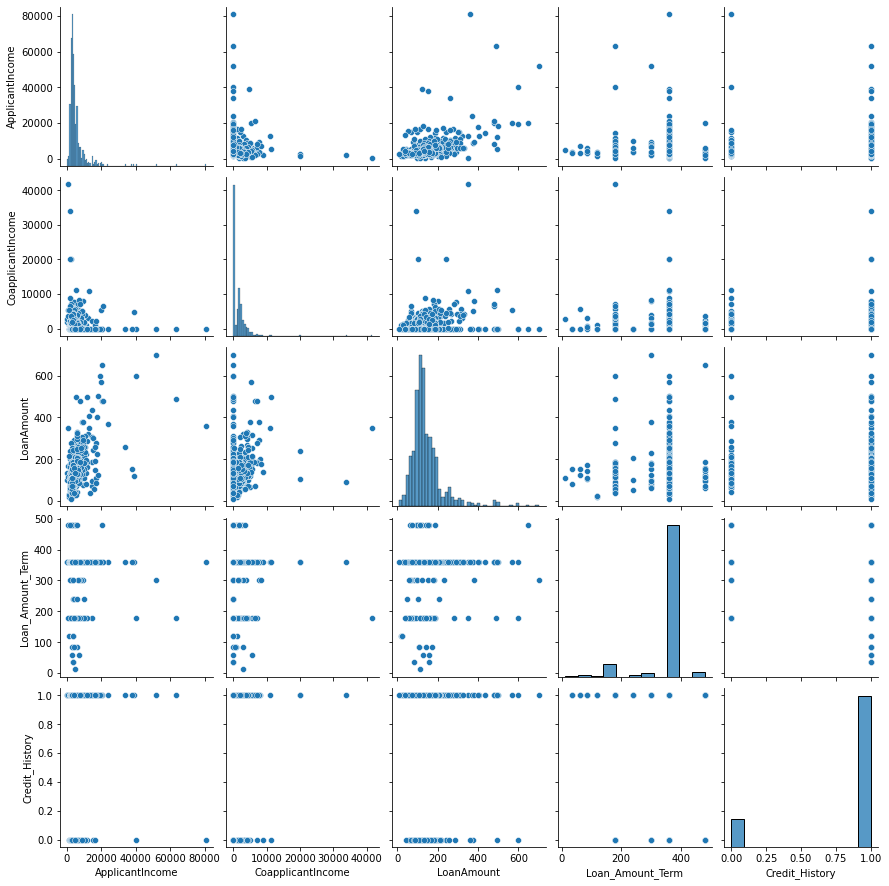

In [24]:
sns.pairplot(loan)

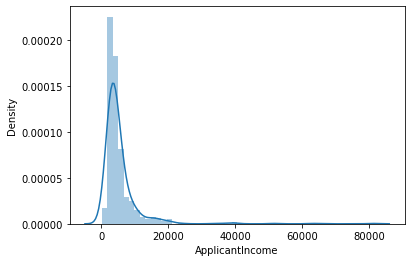

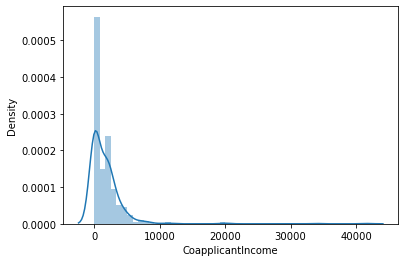

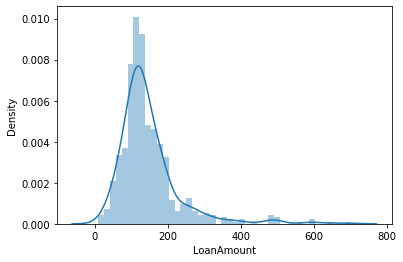

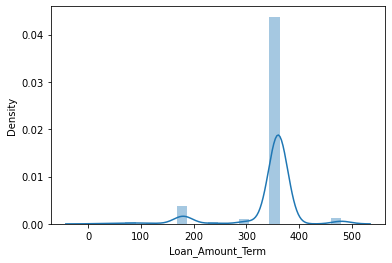

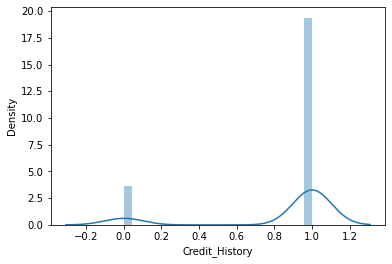

In [26]:
for i in loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]:
    plt.figure()
    sns.distplot(loan[i])

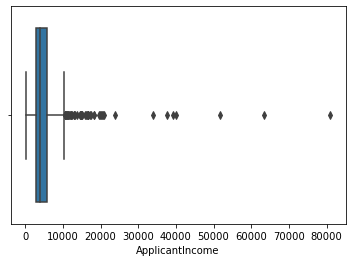

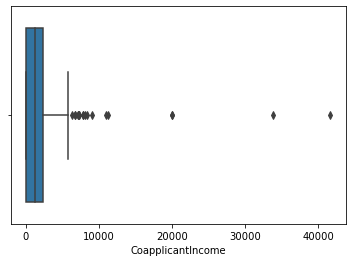

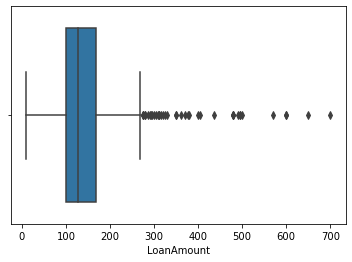

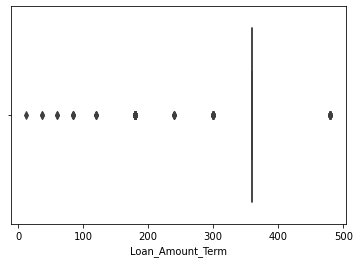

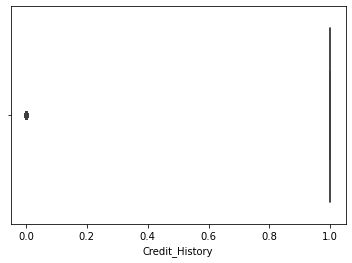

In [27]:
for i in loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]:
    plt.figure()
    sns.boxplot(loan[i])

outliers are present in the columns and need to be treated

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

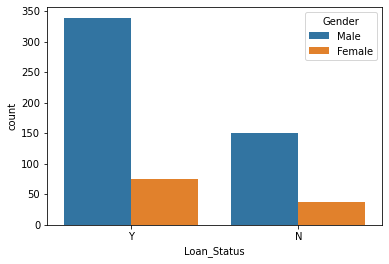

In [29]:
sns.countplot('Loan_Status', hue = 'Gender', data = loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

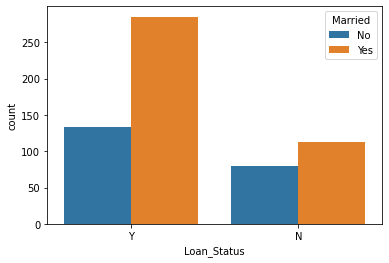

In [30]:
sns.countplot('Loan_Status', hue = 'Married', data = loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

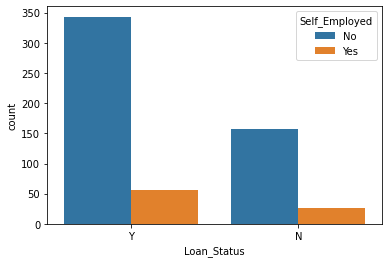

In [31]:
sns.countplot('Loan_Status', hue = 'Self_Employed', data = loan)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

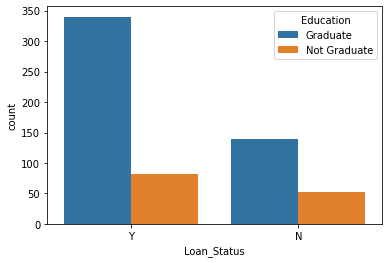

In [32]:
sns.countplot('Loan_Status', hue = 'Education', data = loan)

In [33]:
num = loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [36]:
obj = loan[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

<AxesSubplot:>

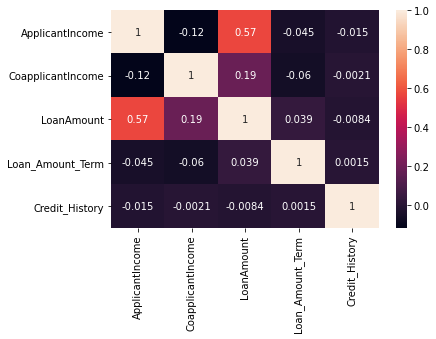

In [37]:
sns.heatmap(loan.corr(), annot = True)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

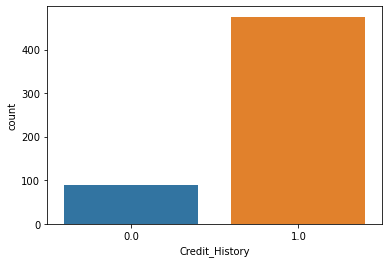

In [44]:
sns.countplot(loan['Credit_History'])

# Data Preprocessing

### treating Missing Values

In [39]:
num.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [43]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy= 'mean')
loan_amt = si.fit_transform(num['LoanAmount'].to_numpy().reshape(-1,1))

In [45]:
loan_amt_term = si.fit_transform(num['Loan_Amount_Term'].to_numpy().reshape(-1,1))

In [46]:
# if loan amount and loan amount term nan values will be filled by mean than their credit history should also be 1
credit_history = si.fit_transform(num['Credit_History'].to_numpy().reshape(-1,1))

In [48]:
num['LoanAmount'] = loan_amt
num['Loan_Amount_Term'] = loan_amt_term
num['Credit_History'] = credit_history

In [49]:
num.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [50]:
obj.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [53]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
gender = si.fit_transform(obj['Gender'].to_numpy().reshape(-1,1))

In [54]:
married = si.fit_transform(obj['Married'].to_numpy().reshape(-1,1))
depend = si.fit_transform(obj['Dependents'].to_numpy().reshape(-1,1))
employ = si.fit_transform(obj['Self_Employed'].to_numpy().reshape(-1,1))

In [55]:
obj['Gender'] = gender
obj['Married'] = married
obj['Dependents'] = depend
obj['Self_Employed'] = employ

In [56]:
obj.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

## removing outliers

In [57]:
from scipy.stats import zscore
z = np.abs(zscore(num))
z

array([[0.07299082, 0.55448733, 0.        , 0.27985054, 0.45164045],
       [0.13441195, 0.03873155, 0.21927331, 0.27985054, 0.45164045],
       [0.39374734, 0.55448733, 0.957641  , 0.27985054, 0.45164045],
       ...,
       [0.43717437, 0.47240418, 1.26937121, 0.27985054, 0.45164045],
       [0.35706382, 0.55448733, 0.4833669 , 0.27985054, 0.45164045],
       [0.13441195, 0.55448733, 0.15972753, 0.27985054, 2.41044061]])

In [58]:
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [59]:
num = num[(z<3).all(axis = 1)]

In [60]:
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


## scaling the data

In [67]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
appln_inc = rs.fit_transform(num['ApplicantIncome'].to_numpy().reshape(-1,1))
coappln_inc = rs.fit_transform(num['CoapplicantIncome'].to_numpy().reshape(-1,1))
loan_amt = rs.fit_transform(num['LoanAmount'].to_numpy().reshape(-1,1))
loan_amt_term = rs.fit_transform(num['Loan_Amount_Term'].to_numpy().reshape(-1,1))

num['ApplicantIncome'] = appln_inc
num['CoapplicantIncome'] = coappln_inc
num['LoanAmount'] = loan_amt
num['Loan_Amount_Term'] = loan_amt_term

In [68]:
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.777695,-0.557035,0.306869,0.0,1.0
1,0.308633,0.112295,0.000000,0.0,1.0
2,-0.277881,-0.557035,-1.033333,0.0,1.0
3,-0.432382,0.489569,-0.133333,0.0,1.0
4,0.833642,-0.557035,0.216667,0.0,1.0


## encoding

In [69]:
obj.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender = le.fit_transform(obj['Gender'])
married = le.fit_transform(obj['Married'])
depend = le.fit_transform(obj['Dependents'])
edu = le.fit_transform(obj['Education'])
employ = le.fit_transform(obj['Self_Employed'])
prop_ar = le.fit_transform(obj['Property_Area'])
loan_status = le.fit_transform(obj['Loan_Status'])

obj['Gender'] = gender
obj['Married'] = married
obj['Dependents'] = depend
obj['Education'] = edu
obj['Self_Employed'] = employ
obj['Property_Area'] = prop_ar
obj['Loan_Status'] = loan_status

In [75]:
obj.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [76]:
loan_new = pd.concat([num,obj], axis = 1)

In [78]:
loan_new.isnull().sum()

ApplicantIncome      37
CoapplicantIncome    37
LoanAmount           37
Loan_Amount_Term     37
Credit_History       37
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
loan_new.dropna(inplace = True)

In [81]:
loan_new.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

### rechecking our new dataframe for further processing

<AxesSubplot:>

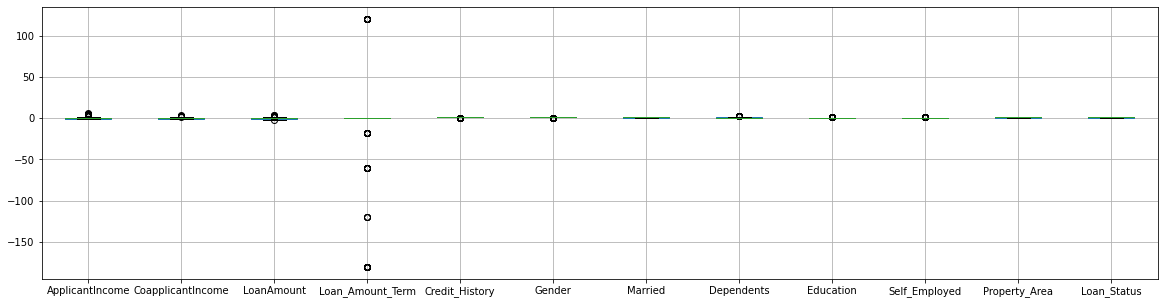

In [85]:
plt.figure(figsize=(20,5))
loan_new.boxplot()

In [86]:
loan_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.339393,0.073594,0.134144,-12.395147,0.838646,0.814558,0.649913,0.719237,0.227036,0.126516,1.031196,0.689775
std,1.098723,0.733043,0.936559,51.819095,0.353795,0.388993,0.477411,0.995229,0.419280,0.332719,0.789953,0.462987
min,-1.333827,-0.557035,-1.983333,-180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.339755,-0.557035,-0.466667,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.660245,0.442965,0.533333,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,6.267877,3.428762,4.200000,120.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000


### we need to remove loan amount term as it giving us very high standard deviation and it may effect our model performance.

# Model Building

In [88]:
X = loan_new.drop(['Loan_Amount_Term','Loan_Status'], axis = 1)
y = loan_new.Loan_Status

In [91]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
lr = LogisticRegression()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()
knc = KNeighborsClassifier()
svc = LinearSVC()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [94]:
models = [lr,gnb,dtc,etc,knc,svc,rfc,abc,gbc]
for m in models:
    print(m)
    m.fit(X_train,y_train)
    print(m.score(X_train,y_train))
    pred_m = m.predict(X_test)
    print('Model Report')
    print(confusion_matrix(y_test,pred_m))
    print(classification_report(y_test,pred_m))
    print('\n')

LogisticRegression()
0.8186528497409327
Model Report
[[ 23  32]
 [  3 133]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.81      0.98      0.88       136

    accuracy                           0.82       191
   macro avg       0.85      0.70      0.73       191
weighted avg       0.83      0.82      0.79       191



GaussianNB()
0.8186528497409327
Model Report
[[ 23  32]
 [  3 133]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.81      0.98      0.88       136

    accuracy                           0.82       191
   macro avg       0.85      0.70      0.73       191
weighted avg       0.83      0.82      0.79       191



DecisionTreeClassifier()
1.0
Model Report
[[ 35  20]
 [ 34 102]]
              precision    recall  f1-score   support

           0       0.51      0.64      0.56        55
           1       0.84 

#### we selected 5 models which are-: 
   * logistic regression ----> 0.82
   * gaussian NB ----> 0.82
   * linear svc ----> 0.82
   * random forest classifier -----> 0.80
   * gradient boost classifeir ----> 0.81
#### on the basis of accuracy score, good f1 score, good precision, and less errors

In [96]:
for m in models:
    cv = cross_val_score(m,X,y,cv=5)
    print(m)
    print('cv:', cv)
    print('mean cv:', cv.mean())
    print('\n')

LogisticRegression()
cv: [0.81034483 0.79310345 0.79130435 0.86086957 0.82608696]
mean cv: 0.8163418290854573


GaussianNB()
cv: [0.81034483 0.79310345 0.79130435 0.82608696 0.80869565]
mean cv: 0.8059070464767617


DecisionTreeClassifier()
cv: [0.74137931 0.69827586 0.69565217 0.66956522 0.72173913]
mean cv: 0.7053223388305847


ExtraTreeClassifier()
cv: [0.77586207 0.71551724 0.70434783 0.77391304 0.65217391]
mean cv: 0.7243628185907047


KNeighborsClassifier()
cv: [0.72413793 0.72413793 0.75652174 0.74782609 0.73913043]
mean cv: 0.7383508245877062


LinearSVC()
cv: [0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
mean cv: 0.8180809595202397


RandomForestClassifier()
cv: [0.77586207 0.78448276 0.76521739 0.80869565 0.82608696]
mean cv: 0.7920689655172414


AdaBoostClassifier()
cv: [0.77586207 0.78448276 0.73913043 0.83478261 0.8173913 ]
mean cv: 0.7903298350824588


GradientBoostingClassifier()
cv: [0.73275862 0.75862069 0.75652174 0.85217391 0.83478261]
mean cv: 0.786971514

### we checked out cross-validation score for all models and for five models which we selected and they perform the best in cv also

* now we will check the GRID SEARCH CV

In [ ]:
lr_param = {
    'C':[0.001,0.1,1,10],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'verbose': [1,10,100,200]
}

# gnb has not much parameters

lsvc_param = {
    'loss':['hinge','squared_hinge'],
    'C': [0.001,0.1,1,10],
    'multi_class': ['ovr','crammer_singer'],
    'fit_intercept': [True, False],
    'verbose': [1,10,100,200]
}

rfc_param = {
    'n_estimators': [100,300,500],
    'criterion': ['gini','entropy'],
    'min_samples_split': [2,3,4,5],
    'verbose': [1,10,100,200]
}

gbc_param = {
    'loss': ['deviance','exponential'],
    'n_estimators': [100,300,500],
    'criterion': ['friedman_mse','mse','mae'],
    'max_depth': [1,3,5,7,9,10]
}

gdsr = GridSearchCV(estimator=lr, param_grid=lr_param)
gdsr.fit(X_train,y_train)
print(gdsr.best_params_)
print(gdsr.best_score_)

output-:
    
{'C': 0.1, 'fit_intercept': True, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'verbose': 1}


0.8186147186147187

In [104]:
gdsr = GridSearchCV(estimator=svc, param_grid=lsvc_param)
gdsr.fit(X_train,y_train)
print(gdsr.best_params_)
print(gdsr.best_score_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

gdsr = GridSearchCV(estimator=rfc, param_grid=rfc_param)
gdsr.fit(X_train,y_train)
print(gdsr.best_params_)
print(gdsr.best_score_)

I copied output here because it was giving very lengthy output, which can display fully in github uploaded file.

output -> {'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 100, 'verbose': 10}
0.8134865134865136

In [115]:
gdsr = GridSearchCV(estimator=gbc, param_grid=gbc_param)
gdsr.fit(X_train,y_train)
print(gdsr.best_params_)
print(gdsr.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'n_estimators': 300}
0.8238095238095239


In [116]:
gbc2 = GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='deviance', max_depth=1, n_estimators= 300)

In [117]:
gbc2.fit(X_train, y_train)
pred_gbc2 = gbc2.predict(X_test)
print(confusion_matrix(y_test,pred_gbc2))
print(classification_report(y_test,pred_gbc2))

[[ 25  30]
 [  8 128]]
              precision    recall  f1-score   support

           0       0.76      0.45      0.57        55
           1       0.81      0.94      0.87       136

    accuracy                           0.80       191
   macro avg       0.78      0.70      0.72       191
weighted avg       0.79      0.80      0.78       191



In [118]:
rfc2 = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=5, verbose=10 )

In [119]:
rfc2.fit(X_train, y_train)
pred_rfc2 = rfc2.predict(X_test)
print(confusion_matrix(y_test,pred_rfc2))
print(classification_report(y_test,pred_rfc2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

In [121]:
lsvc2 = LinearSVC(C = 0.1, fit_intercept= True, loss= 'hinge', multi_class= 'ovr', verbose= 1)

In [122]:
lsvc2.fit(X_train, y_train)
pred_lsvc2 = lsvc2.predict(X_test)
print(confusion_matrix(y_test,pred_lsvc2))
print(classification_report(y_test,pred_lsvc2))

[LibLinear][[ 23  32]
 [  3 133]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.81      0.98      0.88       136

    accuracy                           0.82       191
   macro avg       0.85      0.70      0.73       191
weighted avg       0.83      0.82      0.79       191



In [123]:
lr2 = LogisticRegression(C=0.1, fit_intercept=True, multi_class='multinomial', solver='newton-cg', verbose=1)

In [124]:
lr2.fit(X_train, y_train)
pred_lr2 = lr2.predict(X_test)
print(confusion_matrix(y_test,pred_lr2))
print(classification_report(y_test,pred_lr2))

[[ 23  32]
 [  3 133]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        55
           1       0.81      0.98      0.88       136

    accuracy                           0.82       191
   macro avg       0.85      0.70      0.73       191
weighted avg       0.83      0.82      0.79       191



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [126]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = lr2.predict_proba(X_test)[:,1]

In [127]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

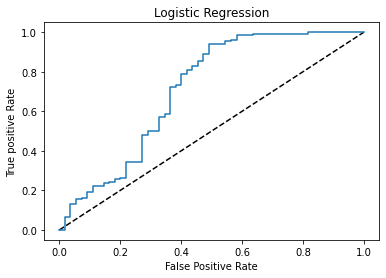

In [128]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Logistic Regression')
plt.show()

In [130]:
auc_score = roc_auc_score(y_test,lr2.predict(X_test))
print(auc_score)

0.6980614973262033


In [134]:
y_pred_proba_rfc = rfc2.predict_proba(X_test)[:,1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [135]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_rfc)

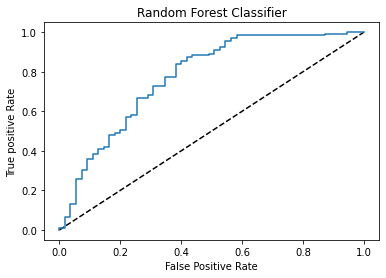

In [136]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [137]:
auc_score = roc_auc_score(y_test,rfc2.predict(X_test))
print(auc_score)

0.7052139037433156


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [138]:
y_pred_proba_gbc = gbc2.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_gbc)

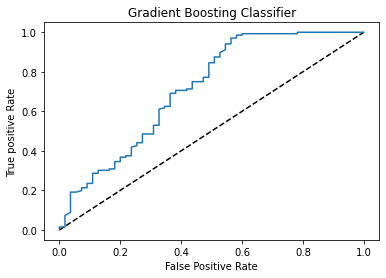

0.6978609625668449


In [139]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score = roc_auc_score(y_test,gbc2.predict(X_test))
print(auc_score)

# Saving the best model
####  the model has less errors and better precisions, high accuracy score, and better roc-auc-curve and auc score.

In [140]:
import joblib
joblib.dump(rfc2 , 'rfc2file.obj')

['rfc2file.obj']

# --------------------------------------------------END------------------------------------------------------